# 第5章 モデルの評価と改良

In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#合成データセットの生成
X,y=make_blobs(random_state=0)

#dataトラベルを訓練セットとテストセットに分割
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

#モデルのインスタンスを作成し訓練データで学習
logreg=LogisticRegression().fit(X_train,y_train)

#テストセットでモデルを評価
print('Test set score: {:.2f}'.format(logreg.score(X_test,y_test)))

Test set score: 0.88


## 5.1 交差検証

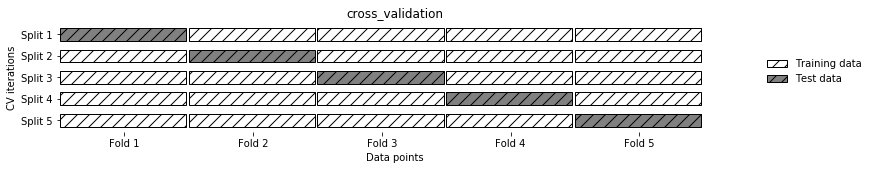

In [2]:
import mglearn
mglearn.plots.plot_cross_validation()

### 5.1.1 scikt-learnでの交差検証

In [3]:
#交差検証(criss validation)
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris=load_iris()
logreg=LogisticRegression()

scores=cross_val_score(logreg,iris.data,iris.target,cv=5) #cvで分割数を決める
print('Cross-validation scores: {}'.format(scores))
print('Average cross-validation score: {:.2f}'.format(scores.mean())) #一般的に平均で評価する

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Average cross-validation score: 0.97


### 5.1.2 交差検証の利点

In [4]:
#すべてのデータを一度テスト可能
#モデルが最悪の場合と、最良の場合がだいたい予測可能
#データを効率的に使用可能(10分割すれば90%を学習に回せる)

#計算量が多いのがデメリット

### 5.1.3 層化k分割交差検証と他の戦略

In [5]:
#以下のように単純に分割すると、偏ることがある
from sklearn.datasets import load_iris
iris=load_iris()
print('Iris labels:\n{}'.format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


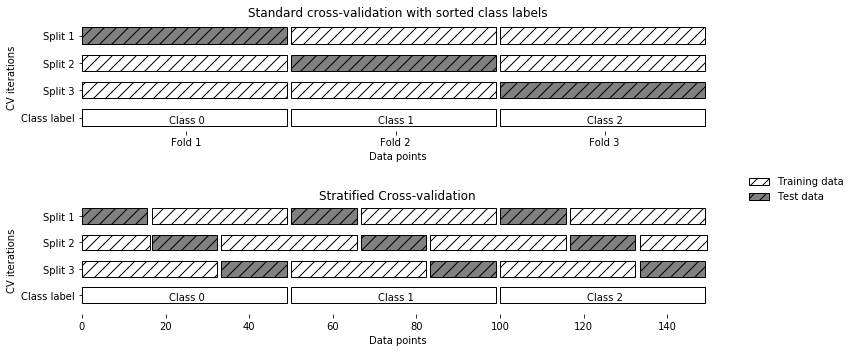

In [6]:
#層化k分割交差検証(stratified k-fold cross_validation)を使う
mglearn.plots.plot_stratified_cross_validation()

#### 5.1.3.1 交差検証のより詳細な制御

In [7]:
#分類の場合はデフォルトで層化k分割、回帰の場合は一般のk分割になる
#分類にk分割交差検証を行う場合は、KFold分割器クラスをインポートし、インスタンスを作成する

#学習データが偏っているので、性能が落ちる

from sklearn.model_selection import KFold
kfold=KFold(n_splits=5)
print('Cross-validation scores:\n{}'.format(
cross_val_score(logreg,iris.data,iris.target,cv=kfold)))

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


In [8]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=3)
print('Cross-validation scores:\n{}'.format(
cross_val_score(logreg,iris.data,iris.target,cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


In [9]:
#分割前にデータをshuffleする方法もある

from sklearn.model_selection import KFold
kfold=KFold(n_splits=3,shuffle=True,random_state=0)
print('Cross-validation scores:\n{}'.format(
cross_val_score(logreg,iris.data,iris.target,cv=kfold)))

Cross-validation scores:
[0.98 0.96 0.96]


#### 5.1.3.2 1つ抜き交差検証

In [10]:
#1つ抜き交差検証(leave-one-out)
#計算量は多いが精度の高い推定が可能

from sklearn.model_selection import LeaveOneOut
loo=LeaveOneOut()
scores=cross_val_score(logreg,iris.data,iris.target,cv=loo)
print('Number of cv iterations: ',len(scores))
print('Mean accuracy: {:.2f}'.format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.97


#### 5.1.3.3 シャッフル分割交差検証

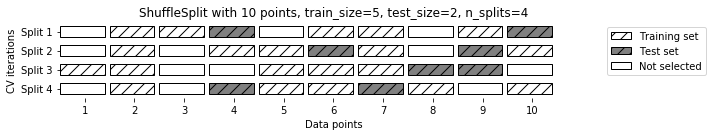

In [11]:
#シャッフル分割交差検証(shuffle-split cross-validation)
mglearn.plots.plot_shuffle_split()

In [12]:
#50%をテスト、50%を訓練に回し、10回分割を繰り返す

from sklearn.model_selection import ShuffleSplit
shuffle_split=ShuffleSplit(test_size=.5,train_size=.5,n_splits=10)
scores=cross_val_score(logreg,iris.data,iris.target,cv=shuffle_split)
print('Cross-validation scores:\n{}'.format(scores))

Cross-validation scores:
[0.96       0.96       0.97333333 0.97333333 0.96       0.97333333
 0.98666667 0.94666667 0.98666667 0.94666667]


#### 5.1.3.4 グループ付き交差検証

In [13]:
#指定したグループが分割されないようにする

from sklearn.model_selection import GroupKFold
#合成データセットを生成
X,y=make_blobs(n_samples=12,random_state=0)
#最初の3サンプルが同じグループに次の4つが同じグループにというようにする
groups=[0,0,0,1,1,1,1,2,2,3,3,3]
scores=cross_val_score(logreg,X,y,groups,cv=GroupKFold(n_splits=3))
print('Cross-validation scores:\n{}'.format(scores))

Cross-validation scores:
[0.75       0.6        0.66666667]


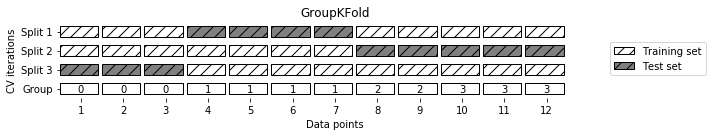

In [14]:
mglearn.plots.plot_group_kfold()

## 5.2 グリッドサーチ
### 5.2.1 単純なグリッドサーチ

In [15]:
#ナイーブなグリッドサーチの実装
from sklearn.svm import SVC
X_train,X_test,y_train,y_test=train_test_split(
iris.data,iris.target,random_state=0)

print('Size of training set: {} size of test set: {}'.format(
X_train.shape[0],X_test.shape[0]))

best_score=0

for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        #それぞれのパラメータの組み合わせに対してSVCを訓練
        svm=SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        #SVCをテストセットで評価
        score=svm.score(X_test,y_test)
        #良いスコアだったらスコアとパラメータを保存
        if score>best_score:
            best_score=score
            best_parameters={'C':C,'gamma':gamma}
            
print('Best_score: {:.2f}'.format(best_score))
print('Best parameters: {}'.format(best_parameters))

Size of training set: 112 size of test set: 38
Best_score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


### 5.2.2 パラメータの過剰適合の危険性と検証セット

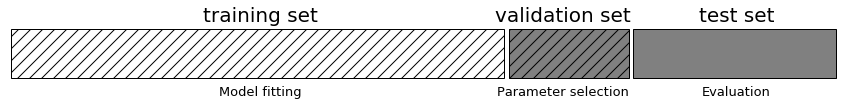

In [16]:
#上記では、テストセットをチューニングに使ってしまったので、制度の評価に使えない
#validationでパラメータのチューニングをし、trainingとvalidationでモデルを作成する手法がある

mglearn.plots.plot_threefold_split()

In [17]:
from sklearn.svm import SVC
#データを訓練+検証セットとテストセットに分割する
X_trainval,X_test,y_trainval,y_test=train_test_split(
iris.data,iris.target,random_state=0)

#訓練+検証セットを訓練セットと検証セットに分割する
X_train,X_valid,y_train,y_valid=train_test_split(
X_trainval,y_trainval,random_state=1)
print('Size of training set:{} size of validation set:{} size of test set:'
      '{}\n'.format(X_train.shape[0],X_valid.shape[0],X_test.shape[0]))

best_score=0

for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        #それぞれのパラメータの組み合わせに対してSVCを訓練
        svm=SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        #SVCをテストセットで評価
        score=svm.score(X_valid,y_valid)
        #良いスコアだったらスコアとパラメータを保存
        if score>best_score:
            best_score=score
            best_parameters={'C':C,'gamma':gamma}
            
print('Best_score: {:.2f}'.format(best_score))
print('Best parameters: {}'.format(best_parameters))

Size of training set:84 size of validation set:28 size of test set:38

Best_score: 0.96
Best parameters: {'C': 10, 'gamma': 0.001}


In [18]:
#テストセットで評価
svm=SVC(**best_parameters)
svm.fit(X_trainval,y_trainval)
test_score=svm.score(X_test,y_test)
print('Test set score with best parameters: {:.2f}'.format(test_score))

Test set score with best parameters: 0.92


### 5.2.3 交差検証を用いたグリッドサーチ

In [19]:
#それぞれのパラメータの組み合わせに対して交差検証を行う

import numpy as np
best_score=0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        #それぞれのパラメータの組み合わせに対してSVCを訓練
        svm=SVC(gamma=gamma,C=C)
        #交差検証を行う
        scores=cross_val_score(svm,X_trainval,y_trainval,cv=5)
        score=np.mean(scores)
        #良いスコアが出たら、スコアとパラメータを記録する
        if score>best_score:
            best_score=score
            best_parameters={'C':C,'gamma':gamma}
#訓練セットと検証セットを合わせてモデルを再構築する
svm=SVC(**best_parameters)
svm.fit(X_trainval,y_trainval)

print('Best_score: {:.2f}'.format(best_score))
print('Best parameters: {}'.format(best_parameters))

Best_score: 0.97
Best parameters: {'C': 10, 'gamma': 0.1}


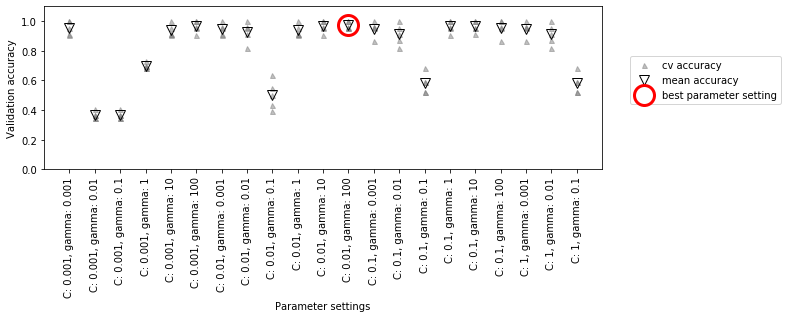

In [20]:
#パラメータの選び方
mglearn.plots.plot_cross_val_selection()

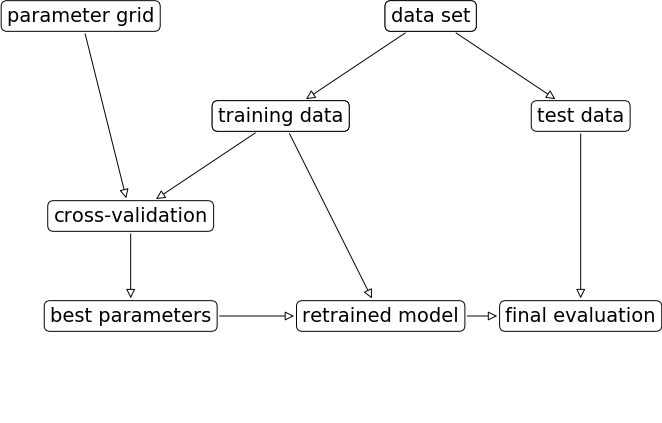

In [21]:
mglearn.plots.plot_grid_search_overview()

In [22]:
#GridSearchCVクラスを使う方法
#交差検証で最も良いスコアだったパラメータを用いて、自動的に訓練セット全体に対して学習する
param_grid={'C':[0.001,0.01,0.1,1,10,100],
           'gamma':[0.001,0.01,0.1,1,10,100]}
print('Parameter grid:\n{}'.format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search=GridSearchCV(SVC(),param_grid,cv=5)

#訓練セットとテストセットを分割する
X_train,X_test,y_train,y_test=train_test_split(
iris.data,iris.target,random_state=0)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [24]:
#スコアは訓練セット全体で学習したときのスコア
print('Test set score: {:.2f}'.format(grid_search.score(X_test,y_test)))
print('Best parameters: {}'.format(grid_search.best_params_))

#交差検証のスコアは交差検証の時のベストスコア
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))

Test set score: 0.97
Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


In [25]:
print('Best estimator:\n{}'.format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


#### 5.2.3.1 交差検証の結果の解析

In [26]:
import pandas as pd
#DataFrameへ変換
results=pd.DataFrame(grid_search.cv_results_)
#最初の5行を表示
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001397,0.000487,0.000996,7.835234e-07,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.001197,0.000399,0.000998,6.314303e-04,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.001396,0.000489,0.000798,3.991136e-04,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.001394,0.000487,0.000798,3.991611e-04,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.001197,0.000399,0.000996,8.609519e-07,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


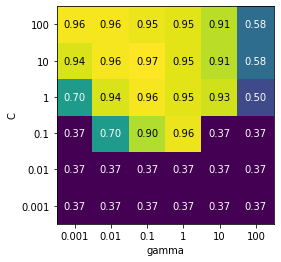

In [27]:
scores=np.array(results.mean_test_score).reshape(6,6)

#平均交差検証スコアのプロット
mglearn.tools.heatmap(scores,xlabel='gamma',xticklabels=param_grid['gamma'],
                     ylabel='C',yticklabels=param_grid['C'],cmap='viridis')

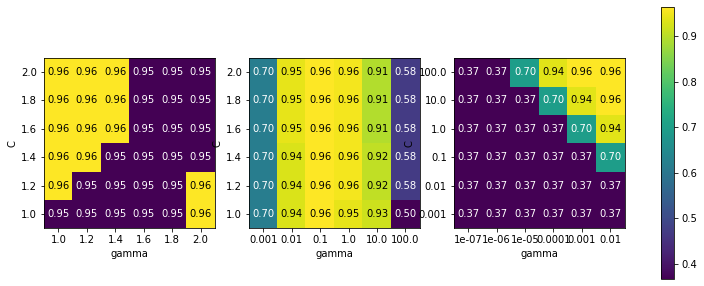

In [28]:
#以下は悪い例
#端に最良値が来ないようにするべき
import matplotlib.pyplot as plt
%matplotlib inline

fig,axes=plt.subplots(1,3,figsize=(13,5))

param_grid_linear={'C':np.linspace(1,2,6),
                  'gamma':np.linspace(1,2,6)}
param_grid_one_log={'C':np.linspace(1,2,6),
                   'gamma':np.logspace(-3,2,6)}
param_grid_range={'C':np.logspace(-3,2,6),
                 'gamma':np.logspace(-7,-2,6)}

for param_grid,ax in zip([param_grid_linear,param_grid_one_log,
                         param_grid_range],axes):
    grid_search=GridSearchCV(SVC(),param_grid,cv=5)
    grid_search.fit(X_train,y_train)
    scores=grid_search.cv_results_['mean_test_score'].reshape(6,6)
    
    #平均交差検証精度をプロット
    scores_image=mglearn.tools.heatmap(
    scores,xlabel='gamma',ylabel='C',xticklabels=param_grid['gamma'],
    yticklabels=param_grid['C'],cmap='viridis',ax=ax)
  
plt.colorbar(scores_image,ax=axes.tolist())    

#### 5.2.3.2 グリッドでないサーチ空間

In [29]:
#条件付きパラメータの指定方法は以下
param_grid=[{'kernel':['rbf'],
            'C':[0.001,0.01,0.1,1,10,100],
            'gamma':[0.001,0.01,0.1,1,10,100]},
           {'kernel':['linear'],
           'C':[0.001,0.01,0.1,1,10,100]}]
print('List of grids:\n{}'.format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [30]:
grid_search=GridSearchCV(SVC(),param_grid,cv=5)
grid_search.fit(X_train,y_train)
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [31]:
results=pd.DataFrame(grid_search.cv_results_)
#表示の都合上テーブルを転置している
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00199571,0.00159826,0.0019937,0.00139556,0.00159864,0.00119944,0.00259528,0.00119681,0.00139565,0.00199814,...,0.00079484,0.000797892,0.00159712,0.00179496,0.000599146,0.000598621,0.00119762,0.000396824,0.00099473,0.000596952
std_fit_time,0.000632488,0.000489815,0.00109171,0.000487179,0.000482931,0.000398576,0.00135381,0.000398565,0.000489824,0.00063287,...,0.000397454,0.000398946,0.000489956,0.000399184,0.000799419,0.000488773,0.000400639,0.00048602,5.39353e-06,0.000487416
mean_score_time,0.000995827,0.000997543,0.000798941,0.000798464,0.000993681,0.00159454,0.000796223,0.00099597,0.000199318,0.000994396,...,0.00039916,0.000399494,0.000596142,0.000399399,0.000798082,0.000598192,0,0.000799942,0,0.00039897
std_score_time,3.13192e-06,6.10091e-06,0.000399476,0.000399233,5.59629e-06,0.000802345,0.000398148,0.000630909,0.000398636,2.79428e-06,...,0.00048887,0.000489279,0.000486761,0.000489162,0.000399042,0.000488423,0,0.000399993,0,0.000488636
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1,0.956522,0.869565,0.521739,0.347826,0.869565,1,1,1,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1,0.956522


#### 5.2.3.3 異なる交差検証手法を用いたグリッドサーチ

In [32]:
#GridSearchCVはcross_val_scoreと同様に、デフォルトではクラス分類には層化k分割交差検証
#回帰にはk分割交差検証を用いる
#5.1.3.1項と同様に交差検証の分割器をcvパラメータとして渡すことが可能

#データが大きい場合はShuffleSplitを用いて、n_iter=1とするとして、データ分割を一度とするのがよい

#### 5.2.3.4 ネストした交差検証

In [33]:
#訓練とテストデータの分割を複数回実施する手法
#データセットに対して選択したモデルが有効かどうかがわかるのみ
#criss_val_scoreにGridSearchCVを呼び出す

scores=cross_val_score(GridSearchCV(SVC(),param_grid,cv=5),
                      iris.data,iris.target,cv=5)
print('Cross-validation scores:',scores)
print('Mean cross-validation score: ',scores.mean())

Cross-validation scores: [0.96666667 1.         0.9        0.96666667 1.        ]
Mean cross-validation score:  0.9666666666666668


In [34]:
#上のコードを詳細に書くと以下のようになる

def nested_cv(X,y,inner_cv,outer_cv,Classifier,parameter_grid):
    outer_scores=[]
    #外側の交差検証による個々の分割に対するループ
    #splitメソッドはインデックスを返す
    for training_samples, test_samples in outer_cv.split(X,y):
        #内側の交差検証を用いて最良のパラメータ設定を見つける
        best_params={}
        best_score=-np.inf
        #個々のパラメータ設定に対するループ
        for parameters in parameter_grid:
            #内側の分割に対するスコアを格納
            cv_scores=[]
            #内側の交差検証のループ
            for inner_train,inner_test in inner_cv.split(
            X[training_samples],y[training_samples]):
                #与えられたパラメータと訓練セットでクラス分類器を訓練
                clf=Classifier(**parameters)
                clf.fit(X[inner_train],y[inner_train])
                #内側のテストセットを評価
                score=clf.score(X[inner_test],y[inner_test])
                cv_scores.append(score)
            #内部の分割に対するスコアの平均を算出
            mean_score=np.mean(cv_scores)
            if mean_score>best_score:
                #これまでのものよりも良ければ、パラメータを記憶
                best_score=mean_score
                best_params=parameters
        #最良のパラメータセットと外側の訓練セットを用いてクラス分類器を構築
        clf=Classifier(**best_params)
        clf.fit(X[training_samples],y[training_samples])
        #評価する
        outer_scores.append(clf.score(X[test_samples],y[test_samples]))
    return np.array(outer_scores)

In [35]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores=nested_cv(iris.data,iris.target,StratifiedKFold(5),
                StratifiedKFold(5),SVC,ParameterGrid(param_grid))
print('Cross-validation scores: {}'.format(scores))

Cross-validation scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]


#### 5.2.3.5 交差検証とグリッドサーチの並列化

In [36]:
#GridSearchCVとCross_val_scoreでn_jobsに利用したいコア数を指定して並列処理可能
#n_jobs=-1とすると、利用できるすべてのコアを利用する

#ネストした並列実行はscikit-learnではサポートされていない

## 5.3 評価基準とスコア
### 5.3.2 2クラス分類における基準
#### 5.3.2.2 偏ったデータセット

In [37]:
#0と1の頻度が偏ったデータを偏ったデータセットという
#偏ったデータセットを作成する

from sklearn.datasets import load_digits

digits=load_digits()
y=digits.target==9

X_train,X_test,y_train,y_test=train_test_split(
digits.data,y,random_state=0)

In [38]:
#すべてFalseで判定しても、正解率が90%出る
from sklearn.dummy import DummyClassifier
dummy_majority=DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
pred_most_frequent=dummy_majority.predict(X_test)
print('Unique predicted labels: {}'.format(np.unique(pred_most_frequent)))
print('Test score: {:.2f}'.format(dummy_majority.score(X_test,y_test)))

Unique predicted labels: [False]
Test score: 0.90


In [39]:
#実際のクラス分類器
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)
pred_tree=tree.predict(X_test)
print('Test score: {:.2f}'.format(tree.score(X_test,y_test)))

Test score: 0.92


In [40]:
#LogisticRegressionと、ランダム分類器を試す
#ランダム分類器はtrain dateでの0,1の同じ比率でランダムに判定する

#ランダムですら80%出る、Logisticはかなり良い精度が出ている

from sklearn.linear_model import LogisticRegression

dummy=DummyClassifier().fit(X_train,y_train)
pred_dummy=dummy.predict(X_test)
print('dummy score: {:.2f}'.format(dummy.score(X_test,y_test)))

logreg=LogisticRegression(C=0.1).fit(X_train,y_train)
pred_logreg=logreg.predict(X_test)
print('logreg score: {:.2f}'.format(logreg.score(X_test,y_test)))

dummy score: 0.83
logreg score: 0.98


#### 5.3.2.3 混同行列

In [41]:
#2クラス分類の評価結果を表現する方法

from sklearn.metrics import confusion_matrix

confusion=confusion_matrix(y_test,pred_logreg)
print('Confusion matrix:\n{}'.format(confusion))

Confusion matrix:
[[402   1]
 [  6  41]]


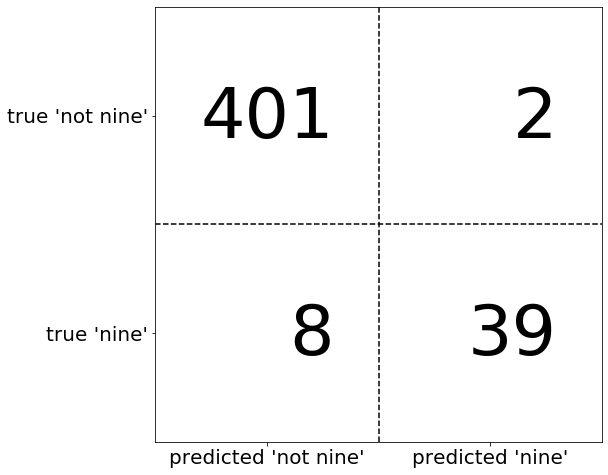

In [42]:
mglearn.plots.plot_confusion_matrix_illustration()

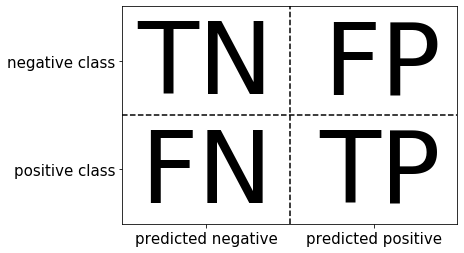

In [43]:
mglearn.plots.plot_binary_confusion_matrix()

In [44]:
print('Most frequent class:')
print(confusion_matrix(y_test,pred_most_frequent))
print('\nDummy model:')
print(confusion_matrix(y_test,pred_dummy))
print('\nDecision tree:')
print(confusion_matrix(y_test,pred_tree))
print('\nLogistic Regression:')
print(confusion_matrix(y_test,pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[359  44]
 [ 41   6]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression:
[[402   1]
 [  6  41]]


In [45]:
#F値を使った評価

from sklearn.metrics import f1_score
print('f1 score most frequent: {:.2f}'.format(
f1_score(y_test,pred_most_frequent)))
print('f1 score dummy: {:.2f}'.format(f1_score(y_test,pred_dummy)))
print('f1 score tree: {:.2f}'.format(f1_score(y_test,pred_tree)))
print('f1 score logistic regression: {:.2f}'.format(
f1_score(y_test,pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.12
f1 score tree: 0.55
f1 score logistic regression: 0.92


In [46]:
#適合率、再現率、F値を一気に計算

#not nineを陽性としたときのスコアが一番上
#nineを要請としたときのスコアが上から二番目

from sklearn.metrics import classification_report
print(classification_report(y_test,pred_most_frequent,
                           target_names=['not nine','nine']))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [47]:
print(classification_report(y_test,pred_dummy,
                           target_names=['not nine','nine']))

              precision    recall  f1-score   support

    not nine       0.90      0.89      0.89       403
        nine       0.12      0.13      0.12        47

    accuracy                           0.81       450
   macro avg       0.51      0.51      0.51       450
weighted avg       0.82      0.81      0.81       450



In [48]:
print(classification_report(y_test,pred_logreg,
                           target_names=['not nine','nine']))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



#### 5.3.2.4 不確実性を考慮に入れる

In [49]:
from mglearn.datasets import make_blobs
X,y=make_blobs(n_samples=(400,50),centers=2,cluster_std=[7.0,2],
              random_state=22)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
svc=SVC(gamma=.05).fit(X_train,y_train)

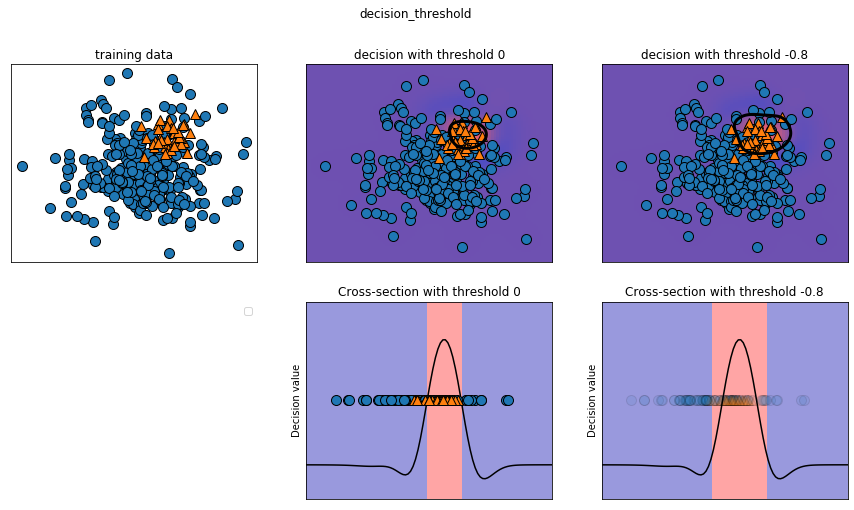

In [50]:
mglearn.plots.plot_decision_threshold()

In [51]:
print(classification_report(y_test,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [52]:
#Decision_functionを変更
y_pred_lower_threshold=svc.decision_function(X_test)>-0.8
print(classification_report(y_test,y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



#### 5.3.2.5 適合率・再現率カーブとROCカーブ

In [53]:
#上記の通り適合率・再現率はthresholdで調整可能
#precision-recall curveを作成する

from sklearn.metrics import precision_recall_curve
precision,recall,thresholds=precision_recall_curve(
y_test,svc.decision_function(X_test))

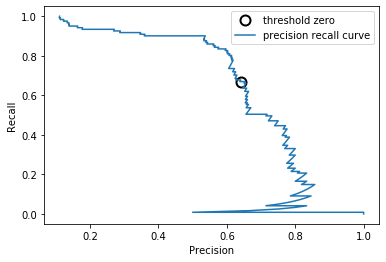

In [54]:
#カーブが滑らかになるようにデータポイントを増やす
X,y=make_blobs(n_samples=(4000,500),centers=2,cluster_std=[7.0,2],
              random_state=22)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
svc=SVC(gamma=.05).fit(X_train,y_train)
precision,recall,thresholds=precision_recall_curve(
y_test,svc.decision_function(X_test))
#ゼロに最も近いスレッショルドを探す
close_zero=np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero],recall[close_zero],'o',markersize=10,
        label='threshold zero',fillstyle='none',c='k',mew=2)

plt.plot(precision,recall,label='precision recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend()

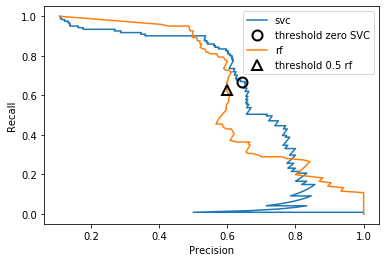

In [55]:
#ランダムフォレストと比較してみる
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=0,max_features=2)
rf.fit(X_train,y_train)

precision_rf,recall_rf,thresholds_rf=precision_recall_curve(
y_test,rf.predict_proba(X_test)[:,1])

plt.plot(precision,recall,label='svc')
plt.plot(precision[close_zero],recall[close_zero],'o',markersize=10,
        label='threshold zero SVC',fillstyle='none',c='k',mew=2)

plt.plot(precision_rf,recall_rf,label='rf')

close_default_rf=np.argmin(np.abs(thresholds_rf-0.5))
plt.plot(precision_rf[close_default_rf],recall_rf[close_default_rf],'^',c='k',
        markersize=10,label='threshold 0.5 rf', fillstyle='none',mew=2)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend()

In [56]:
print('f1 score of random forest: {:.3f}'.format(
f1_score(y_test,rf.predict(X_test))))
print('f1_score of svc: {:.3f}'.format(f1_score(y_test,svc.predict(X_test))))

f1 score of random forest: 0.610
f1_score of svc: 0.656


In [57]:
#カーブを積分することで数値化可能
from sklearn.metrics import average_precision_score
ap_rf=average_precision_score(y_test,rf.predict_proba(X_test)[:,1])
ap_svc=average_precision_score(y_test,svc.decision_function(X_test))
print('Average precision of random forest: {:.3f}'.format(ap_rf))
print('Average precision of svc: {:.3f}'.format(ap_svc))

Average precision of random forest: 0.660
Average precision of svc: 0.666


#### 5.3.2.6 受信者動作特性(ROC)とAUC

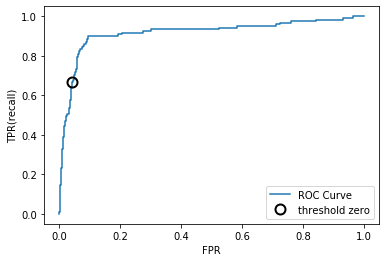

In [58]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,svc.decision_function(X_test))

plt.plot(fpr,tpr,label='ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR(recall)')

#0に近いスレッショルドを見つける
close_zero=np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero],tpr[close_zero],'o',markersize=10,
        label='threshold zero',fillstyle='none',c='k',mew=2)
plt.legend(loc=4)

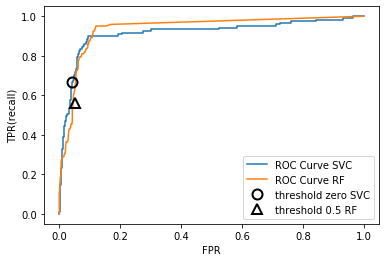

In [59]:
from sklearn.metrics import roc_curve
fpr_rf,tpr_rf,thresholds_rf=roc_curve(y_test,rf.predict_proba(X_test)[:,1])

plt.plot(fpr,tpr,label='ROC Curve SVC')
plt.plot(fpr_rf,tpr_rf,label='ROC Curve RF')

plt.xlabel('FPR')
plt.ylabel('TPR(recall)')
plt.plot(fpr[close_zero],tpr[close_zero],'o',markersize=10,
        label='threshold zero SVC',fillstyle='none',c='k',mew=2)

close_default_rf=np.argmin(np.abs(thresholds_rf-0.5))
plt.plot(fpr_rf[close_default_rf],tpr[close_default_rf],'^',markersize=10,
        label='threshold 0.5 RF',fillstyle='none',c='k',mew=2)
plt.legend()

In [60]:
#カーブを積分してArea under the curveとして数値化可能

from sklearn.metrics import roc_auc_score
rf_auc=roc_auc_score(y_test,rf.predict_proba(X_test)[:,1])
svc_auc=roc_auc_score(y_test,svc.decision_function(X_test))
print('AUC for Random Forest: {:.3f}'.format(rf_auc))
print('AUC for SVC: {:.3f}'.format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


gamma=1.00 accuracy=0.90 AUC=0.50
gamma=0.10 accuracy=0.90 AUC=0.96
gamma=0.01 accuracy=0.90 AUC=1.00


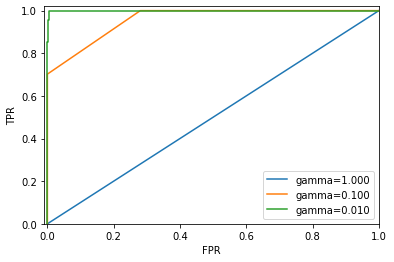

In [61]:
#digitsデータに戻る

y=digits.target==9

X_train,X_test,y_train,y_test=train_test_split(
digits.data,y,random_state=0)

plt.figure()

for gamma in [1,0.1,0.01]:
    svc=SVC(gamma=gamma).fit(X_train,y_train)
    accuracy=svc.score(X_test,y_test)
    auc=roc_auc_score(y_test,svc.decision_function(X_test))
    fpr,tpr,_=roc_curve(y_test,svc.decision_function(X_test))
    print('gamma={:.2f} accuracy={:.2f} AUC={:.2f}'.format(gamma,accuracy,auc))
    plt.plot(fpr,tpr,label='gamma={:.3f}'.format(gamma))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim(-0.01,1)
plt.ylim(0,1.02)
plt.legend()

### 5.3.3 多クラス分類の基準

In [62]:
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(
digits.data,digits.target,random_state=0)
lr=LogisticRegression().fit(X_train,y_train)
pred=lr.predict(X_test)
print('Accuracy: {:.3f}'.format(accuracy_score(y_test,pred)))
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test,pred)))

Accuracy: 0.951
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


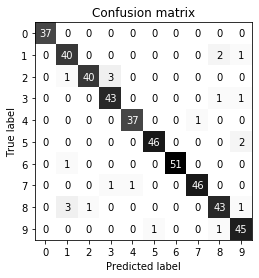

In [63]:
scores_image=mglearn.tools.heatmap(
confusion_matrix(y_test,pred),xlabel='Predicted label',
ylabel='True label',xticklabels=digits.target_names,
yticklabels=digits.target_names,cmap=plt.cm.gray_r,fmt='%d')
plt.title('Confusion matrix')
plt.gca().invert_yaxis()

In [64]:
#macro平均は重みを付けずにクラス毎のf値を平均する
#weighted平均は各クラスの支持度に応じて重みを付けて、クラス毎のf値を平均する
#micro平均は全てのクラスの偽陽性、偽陰性、真陽性の総数を計算し、その値を用いて計算する

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [65]:
#Micro average計算
print('Micro average f1 score: {:.3f}'.format(f1_score(y_test,pred,average='micro')))

#Macro average計算
print('Micro average f1 score: {:.3f}'.format(f1_score(y_test,pred,average='macro')))

Micro average f1 score: 0.951
Micro average f1 score: 0.952


### 5.3.4 回帰の基準

In [66]:
#R2を使用すれば十分

### 5.3.5 評価基準を用いたモデル選択

In [67]:
#AUCをcross_val_scoreで用いる

#デフォルトのクラス分類スコアは精度
print('Default scoring: {}'.format(
cross_val_score(SVC(),digits.data,digits.target==9)))

Default scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]


In [68]:
#scoring=accuracyとしても結果は同じ
explicit_accuracy=cross_val_score(SVC(),digits.data,digits.target==9,
                                 scoring='accuracy')
print('Explicit accuracy scoring: {}'.format(explicit_accuracy))

Explicit accuracy scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]


In [69]:
#AUCを使用する場合
roc_auc=cross_val_score(SVC(),digits.data,digits.target==9,
                       scoring='roc_auc')
print('AUC scoring; {}'.format(roc_auc))

AUC scoring; [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [70]:
#AUCをGridSearchCVで用いる
X_train,X_test,y_train,y_test=train_test_split(
digits.data,digits.target==9,random_state=0)

#説明の都合上あまりよくないグリッドを与える
param_grid={'gamma':[0.0001,0.01,0.1,1,10]}
#デフォルトのスコア法である精度で評価
grid=GridSearchCV(SVC(),param_grid=param_grid)
grid.fit(X_train,y_train)
print('Grid-Search with accuracy')
print('Best parameters:',grid.best_params_)
print('Best cross-validation score (accuracy): {:.3f}'.format(grid.best_score_))
print('Test set AUC: {:.3f}'.format(
roc_auc_score(y_test,grid.decision_function(X_test))))
print('Test set accuracy: {:.3f}'.format(grid.score(X_test,y_test)))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy): 0.976
Test set AUC: 0.992
Test set accuracy: 0.973


In [71]:
grid=GridSearchCV(SVC(),param_grid=param_grid,scoring='roc_auc')
grid.fit(X_train,y_train)
print('Grid-Search with AUC')
print('Best parameters:',grid.best_params_)
print('Best cross-validation score (accuracy): {:.3f}'.format(grid.best_score_))
print('Test set AUC: {:.3f}'.format(
roc_auc_score(y_test,grid.decision_function(X_test))))

Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (accuracy): 0.998
Test set AUC: 1.000


In [72]:
#指定できるのは以下などがある
#average_precision: 適合率-再現率カーブの下側の面積
#f1,f1_macro,f1_micro,f1_weighted

#回帰で用いられるのはr2等

from sklearn.metrics.scorer import SCORERS
print('Available scorers:\n{}'.format(sorted(SCORERS.keys())))

Available scorers:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']
